In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# libraries for computation
import pandas as pd
import numpy as np

#library for train test split
from sklearn.model_selection import train_test_split,cross_val_score,KFold

#library for preprocessing
from sklearn.preprocessing import StandardScaler

#library for Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

#Library for feature selection techniques
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectFromModel
#libraries for various ML models 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor



#libraries for model performance evaluation
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

#libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

In [97]:
data = pd.read_csv("data.csv")
data.head()

,user,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,iroy@gmail.com,0.135,0.339,0.204,0.130,0.200,0.070,0.147,0.373,0.226,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,iroy@gmail.com,0.108,0.565,0.457,0.124,0.237,0.113,0.176,0.777,0.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,iroy@gmail.com,0.108,0.565,0.457,0.124,0.237,0.113,0.176,0.777,0.601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,iroy@gmail.com,0.185,0.489,0.304,0.200,0.402,0.202,0.173,1.293,1.120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,iroy@gmail.com,0.127,0.440,0.313,0.138,0.313,0.175,0.184,1.248,1.064,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
y = pd.read_csv("test.csv")
y.head()

,user,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,...,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.enter,UD.l.enter,H.enter,Target
0,ranjan_dmc@yahoo.com,0.146,0.374,0.228,0.159,0.331,0.172,0.122,0.323,0.201,...,0.233,0.126,0.159,0.359,0.200,0.093,0.305,0.212,0.088,Imposter
1,iroy@gmail.com,0.131,0.584,0.453,0.118,0.288,0.170,0.135,0.597,0.462,...,0.177,0.073,0.145,0.143,-0.002,0.133,1.888,1.755,0.181,Imposter
2,iroy@gmail.com,0.103,0.288,0.185,0.164,0.240,0.076,0.122,0.215,0.093,...,0.181,0.042,0.161,0.140,-0.021,0.178,0.496,0.318,0.161,Imposter
3,i.kroy@yahoo.com,0.102,1.167,1.065,0.096,2.032,1.936,0.101,1.586,1.485,...,1.450,1.354,0.091,1.010,0.919,0.084,1.152,1.068,0.095,Imposter
4,i.kroy@yahoo.com,0.100,1.280,1.180,0.099,2.116,2.017,0.103,1.485,1.382,...,2.012,1.915,0.086,0.876,0.790,0.084,0.923,0.839,0.080,Imposter


In [99]:
data.columns


Index(['user', 'H.period', 'DD.period.t', 'UD.period.t', 'H.t', 'DD.t.i',
       'UD.t.i', 'H.i', 'DD.i.e', 'UD.i.e', 'H.e', 'DD.e.5', 'UD.e.5', 'H.5',
       'DD.5.R', 'UD.5.R', 'H.R', 'DD.R.o', 'UD.R.o', 'H.o', 'DD.o.a',
       'UD.o.a', 'H.a', 'DD.a.n', 'UD.a.n', 'H.n', 'DD.n.l', 'UD.n.l', 'H.l',
       'DD.l.enter', 'UD.l.enter', 'H.enter', 'Target', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61'],
      dtype='object')

In [100]:
y.describe()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.enter,UD.l.enter,H.enter
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,...,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,0.130787,1.308557,1.177770,0.139066,0.915787,0.776721,0.141885,0.988098,0.846213,0.151164,...,0.131656,1.024705,0.893049,0.166377,1.069721,0.903344,0.125410,1.406016,1.280607,0.135033
std,0.069265,1.257386,1.248395,0.127924,0.974072,0.976756,0.118910,0.791337,0.777962,0.098240,...,0.067069,0.968349,0.975719,0.198102,1.234678,1.119240,0.071083,0.943145,0.944769,0.095391
min,0.001000,0.194000,0.026000,0.000000,0.062000,-0.034000,0.000000,0.112000,-0.029000,0.000000,...,0.000000,0.003000,-0.072000,0.000000,0.001000,-0.021000,0.000000,0.305000,0.182000,0.000000
25%,0.097000,0.445000,0.378000,0.092000,0.240000,0.159000,0.106000,0.318000,0.176000,0.117000,...,0.102000,0.177000,0.092000,0.089000,0.216000,0.182000,0.080000,0.602000,0.451000,0.088000
50%,0.128000,0.773000,0.634000,0.138000,0.511000,0.394000,0.141000,0.684000,0.492000,0.151000,...,0.145000,0.725000,0.589000,0.129000,0.503000,0.391000,0.133000,1.181000,1.030000,0.132000
75%,0.185000,1.832000,1.639000,0.165000,1.333000,1.166000,0.169000,1.639000,1.485000,0.179000,...,0.171000,1.706000,1.508000,0.178000,1.612000,1.432000,0.165000,2.008000,1.801000,0.171000
max,0.277000,7.787000,7.786000,1.007000,5.776000,5.712000,0.940000,3.639000,3.432000,0.689000,...,0.241000,3.760000,3.759000,1.371000,6.181000,5.495000,0.389000,4.386000,4.133000,0.717000


In [101]:
train=data
test=y
#user=y[y.columns[1]]
features1 = list(data.columns[1:32])
features2 = list(y.columns[1:32])
X_train = train[features1]
y_train = train['Target']
X_test = test[features2]
y_test = test['Target']

In [102]:
print(X_train.head())

   H.period  DD.period.t  UD.period.t    H.t  DD.t.i  UD.t.i    H.i  DD.i.e  \
0     0.135        0.339        0.204  0.130   0.200   0.070  0.147   0.373   
1     0.108        0.565        0.457  0.124   0.237   0.113  0.176   0.777   
2     0.108        0.565        0.457  0.124   0.237   0.113  0.176   0.777   
3     0.185        0.489        0.304  0.200   0.402   0.202  0.173   1.293   
4     0.127        0.440        0.313  0.138   0.313   0.175  0.184   1.248   

   UD.i.e    H.e  ...    H.a  DD.a.n  UD.a.n    H.n  DD.n.l  UD.n.l    H.l  \
0   0.226  0.132  ...  0.096   0.249   0.153  0.137   0.327   0.190  0.152   
1   0.601  0.139  ...  0.099   0.179   0.080  0.135   0.163   0.028  0.202   
2   0.601  0.139  ...  0.099   0.179   0.080  0.135   0.163   0.028  0.202   
3   1.120  0.157  ...  0.145   0.340   0.195  0.138   0.654   0.516  0.153   
4   1.064  0.146  ...  0.170   0.253   0.083  0.129   0.516   0.387  0.114   

   DD.l.enter  UD.l.enter  H.enter  
0       5.246      

In [103]:
print(y_train)

0      Imposter
1      Imposter
2      Imposter
3      Imposter
4      Imposter
         ...   
149     Genuine
150     Genuine
151     Genuine
152     Genuine
153     Genuine
Name: Target, Length: 154, dtype: object


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 62 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   user         154 non-null    object 
 1   H.period     154 non-null    float64
 2   DD.period.t  154 non-null    float64
 3   UD.period.t  154 non-null    float64
 4   H.t          154 non-null    float64
 5   DD.t.i       154 non-null    float64
 6   UD.t.i       154 non-null    float64
 7   H.i          154 non-null    float64
 8   DD.i.e       154 non-null    float64
 9   UD.i.e       154 non-null    float64
 10  H.e          154 non-null    float64
 11  DD.e.5       154 non-null    float64
 12  UD.e.5       154 non-null    float64
 13  H.5          154 non-null    float64
 14  DD.5.R       154 non-null    float64
 15  UD.5.R       154 non-null    float64
 16  H.R          154 non-null    float64
 17  DD.R.o       154 non-null    float64
 18  UD.R.o       154 non-null    float64
 19  H.o     

In [105]:
data.describe()

,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,...,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,1.000,1.000,1.000,1.000,1.000,1.0,1.000,1.000,1.000,1.000
mean,0.158935,1.547266,1.388331,0.148747,0.884344,0.735597,0.145987,0.960864,0.814877,0.147942,...,0.002,0.007,0.005,0.003,0.003,0.0,0.003,0.007,0.004,0.004
std,0.182206,4.355144,4.358235,0.143716,0.859054,0.837638,0.123586,0.793900,0.764526,0.107839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.001000,0.000000,0.000000,0.000000,-0.263000,0.000000,0.001000,-0.016000,0.000000,...,0.002,0.007,0.005,0.003,0.003,0.0,0.003,0.007,0.004,0.004
25%,0.098250,0.482250,0.367500,0.089250,0.252000,0.127750,0.099250,0.309000,0.171750,0.095250,...,0.002,0.007,0.005,0.003,0.003,0.0,0.003,0.007,0.004,0.004
50%,0.124000,0.856000,0.702500,0.124000,0.508500,0.406500,0.124000,0.769000,0.627000,0.137000,...,0.002,0.007,0.005,0.003,0.003,0.0,0.003,0.007,0.004,0.004
75%,0.203750,1.812750,1.632500,0.188250,1.430750,1.185250,0.176000,1.478250,1.259500,0.177750,...,0.002,0.007,0.005,0.003,0.003,0.0,0.003,0.007,0.004,0.004
max,2.073000,53.648000,53.646000,1.180000,4.935000,4.810000,1.181000,4.435000,4.311000,0.822000,...,0.002,0.007,0.005,0.003,0.003,0.0,0.003,0.007,0.004,0.004


In [106]:
data['user'].value_counts()


indraniroy389@yahoo.com     39
simon.souletta@gmail.com    11
sumonkundu377@gmail.com     11
iroy@gmail.com              10
ranjan_dmc@yahoo.com        10
aroti21@yahoo.com           10
shaktiroy2021@yahoo.com     10
i.kroy@yahoo.com            10
jaintapaul1998@gmail.com    10
putulroy11@yahoo.com        10
mdrashidahmed4@gmail.com    10
arifk60@gmail.com           10
nks100bd@gmail.com           3
Name: user, dtype: int64

In [107]:
data['Target'].value_counts()


Imposter    117
Genuine      37
Name: Target, dtype: int64

In [108]:
y['Target'].value_counts()


Imposter    49
Genuine     12
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

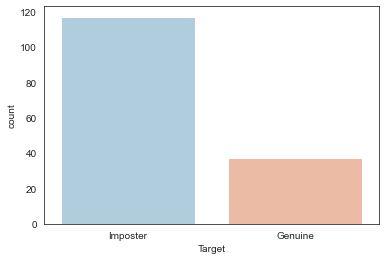

In [109]:
sns.countplot(x='Target',data=data,palette='RdBu_r')


In [110]:
def plotConfusion(cm):
    sns.set_style('white')
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel1)
    classNames = ['Genuine','Imposter']
    plt.title('Confusion Matrix',fontsize = 15)
    plt.ylabel('True label',fontsize=15)
    plt.xlabel('Predicted label',fontsize=15)
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames,fontsize=12)
    plt.yticks(tick_marks, classNames,fontsize=12)
    s = [['TP','FN'], ['FP', 'TN']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

[[12  0]
 [ 3 46]]


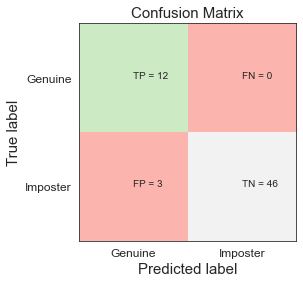

In [111]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

[1.0, 0.9527753810756399, 0.9838499239479466, 0.9228955062394767, 0.9527753810756399, 0.9228955062394767, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456]


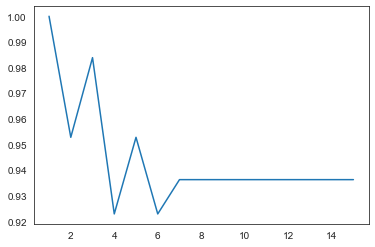

In [112]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores) 

In [113]:
#Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.7421285454072339
Accuracy Score:  0.8032786885245902


In [114]:
#DT
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
d_classifier.fit(X_train,y_train)
pred = d_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.8754297673028053
Accuracy Score:  0.8688524590163934


In [115]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
rf_classifier.fit(X_train,y_train)
pred = rf_classifier.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9660506706408345
Accuracy Score:  0.9672131147540983


[0.8869494676356262, 0.9672131147540983, 0.9660506706408345, 1.0, 0.9833329733543561, 0.9833329733543561, 0.9833329733543561, 0.9833329733543561]


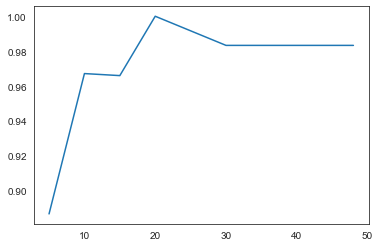

In [116]:
#Ensemble Random Forest Classifier Fine Tunning
estimators = [5,10,15,20,30,35,40,48]
f1_scores = []
for e in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
    rf_classifier.fit(X_train,y_train)
    pred = rf_classifier.predict(X_test)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(estimators,f1_scores) 
print(f1_scores)

In [117]:
#Bagging Classifier with Decision tree as base learner
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=150, random_state=7)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9833329733543561
Accuracy Score:  0.9836065573770492


In [118]:
#ExtraTreeClassifier
num_trees = 80
max_features = 30
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9838499239479466
Accuracy Score:  0.9836065573770492


In [119]:
# AdaBoostClassifier
seed = 7
num_trees = 100
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9515497718438397
Accuracy Score:  0.9508196721311475


In [120]:
seed = 7
num_trees = 100
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))


F1 Score:  0.9192496197397331
Accuracy Score:  0.9180327868852459


F1 Score:  1.0
Accuracy Score:  1.0
[[12  0]
 [ 0 49]]


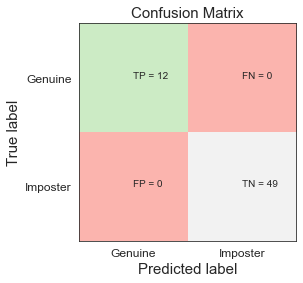

In [121]:
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=5)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=30)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=30)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
pred = ensemble.predict(X_test)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))
cm = confusion_matrix(y_test,pred)
print(cm)
plotConfusion(cm)

In [122]:
#MLPClassifier
net = net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
net.fit(X_train,y_train)
pred= net.predict(X_test)

print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.94803719247803
Accuracy Score:  0.9508196721311475


In [123]:
pca = PCA(n_components=15)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 

In [124]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca,y_train)
pred = knn.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9527753810756399
Accuracy Score:  0.9508196721311475


[1.0, 0.9527753810756399, 0.9838499239479466, 0.9377148836514027, 0.9527753810756399, 0.9228955062394767, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456]


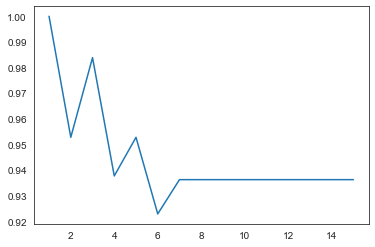

In [125]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca,y_train)
    pred = knn.predict(X_test_pca)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores)

In [126]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_pca,y_train)
pred = rf_classifier.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9660506706408345
Accuracy Score:  0.9672131147540983


In [127]:
#ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, max_features=5)
model.fit(X_train_pca, y_train)
pred = model.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  1.0
Accuracy Score:  1.0


In [128]:
pca = PCA(n_components=5)  
X_train_pca = pca.fit_transform(X_train)  
X_test_pca = pca.transform(X_test) 
#Version 13 imporvement
# Try with Different Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
# create the sub models
estimators = []
model1 = KNeighborsClassifier(n_neighbors=4)
estimators.append(('Knn', model1))
model2 = RandomForestClassifier(n_estimators=100, max_features=5)
estimators.append(('RandomForest', model2))
model3 = ExtraTreesClassifier(n_estimators=100, max_features=5)
estimators.append(('ExtraTree', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train_pca, y_train)
pred = ensemble.predict(X_test_pca)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9672131147540983
Accuracy Score:  0.9672131147540983


In [129]:
svd = TruncatedSVD(n_components=25)
X_train_svd = svd.fit_transform(X_train,y_train)
X_test_svd = svd.transform(X_test)

In [130]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_svd,y_train)
pred = knn.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.9527753810756399
Accuracy Score:  0.9508196721311475


[1.0, 0.9527753810756399, 0.9838499239479466, 0.9228955062394767, 0.9527753810756399, 0.9228955062394767, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456, 0.9362652374947456]


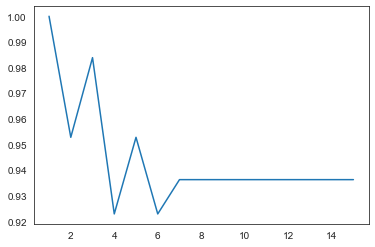

In [131]:
#KNN for different k values
kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
f1_scores = []

for k in kVals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_svd,y_train)
    pred = knn.predict(X_test_svd)
    f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
plt.plot(kVals,f1_scores)    
print(f1_scores)

In [132]:
#Ensemble Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=150, random_state = 42)
rf_classifier.fit(X_train_svd,y_train)
pred = rf_classifier.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.94803719247803
Accuracy Score:  0.9508196721311475


In [133]:
#ExtraTreeClassifier
model = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state=7)
model.fit(X_train_svd, y_train)
pred = model.predict(X_test_svd)
print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
print("Accuracy Score: ", accuracy_score(y_test,pred))

F1 Score:  0.94803719247803
Accuracy Score:  0.9508196721311475


In [208]:
#st="0.135,0.339,0.204,0.13,0.2,0.07,0.147,0.373,0.226,0.132,2.272,2.14,0.117,0.808,0.691,0.154,1.659,1.505,0.109,0.513,0.404,0.096,0.249,0.153,0.137,0.327,0.19,0.152,5.246,5.094,0.095"(indranil-imposter)
#st="0.105,0.683,0.578,0.092,0.563,0.471,0.119,0.293,0.174,0.11,0.977,0.867,0.112,0.676,0.564,0.116,0.546,0.43,0.115,0.319,0.204,0.086,0.267,0.181,0.112,0.295,0.183,0.083,0.48,0.397,0.082"(Ranjan-imposter)
#st="0.137,0.531,0.394,0.106,1.15,1.044,0.157,0.328,0.171,0.159,0.799,0.64,0.12,1.085,0.965,0.127,0.92,0.793,0.111,0.303,0.192,0.188,0.228,0.04,0.1,0.452,0.352,0.096,0.5,0.404,0.088"(indrani-Genuine)
#st="0.155,0.594,0.439,0.129,0.515,0.386,0.132,1.345,1.213,0.14,1.31,1.17,0.157,1.788,1.631,0.136,1.117,0.981,0.135,0.627,0.492,0.12,0.591,0.471,0.176,0.444,0.268,0.141,0.951,0.81,0.228"(indranil-imposter)
#st="0.451,2.987,2.536,0.181,2.051,1.87,0.181,2.307,2.126,0.317,2.975,2.658,0.449,3.641,3.192,0.247,5.662,5.415,0.266,2.436,2.17,0.323,1.97,1.647,0.338,5.584,5.246,0.362,2.702,2.34,0.303"(aroti-imposter)
#st="0.09,0.449,0.359,0.123,0.282,0.159,0.133,0.576,0.443,0.136,2.606,2.47,0.145,1.723,1.578,0.153,1.322,1.169,0.143,0.277,0.134,0.12,0.282,0.162,0.089,0.409,0.32,0.084,0.555,0.471,0.111"(indrani-Genuine)
#st="0.328,1.606,1.278,0.256,1.839,1.583,0.243,1.375,1.132,0.237,1.962,1.725,0.243,3.029,2.786,0.251,3.711,3.46,0.278,1.728,1.45,0.256,1.961,1.705,0.257,1.544,1.287,0.225,1.822,1.597,0.234"(shaktiroy-imposter)
#st="0.18,3.515,3.335,0.002,0.194,0.192,0.94,0.995,0.055,0.689,4.25,3.561,0.138,3.639,3.501,0.74,3.746,3.006,0.125,5.843,5.718,0.001,2.879,2.878,0.686,6.181,5.495,0.001,2.637,2.636,0.059"(sumon-Imposter)
li = list(st.split(','))
#li1 = list(st1.split(','))

In [209]:
ar = np.array(li)
arr = ar.reshape(1,31)
#ar1 = np.array(li1)
#arr1 = ar1.reshape(1,31)

In [210]:
arr.shape
#arr1.shape


(1, 31)

In [211]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
#model = ExtraTreesClassifier(n_estimators=50, max_features=20,random_state=7)
#model.fit(X_train_svd, y_train)
res = knn.predict(arr)
#res1 = knn.predict(arr1)

In [212]:
res[0]
#res1[0]

'Imposter'

In [139]:
# Import label encoder
#from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
#label_OneHotEncoder = preprocessing.OneHotEncoder()
  
#y_train= label_OneHotEncoder.fit_transform(y_train.values.reshape(-1,1))
  
#y_train.unique()
#print(y_train)

In [140]:
#print(y_train.shape)

In [141]:
#print(type(y_train))

In [142]:
#print(X_train)

In [86]:
#print(y_train)

In [87]:
#print(X_test)

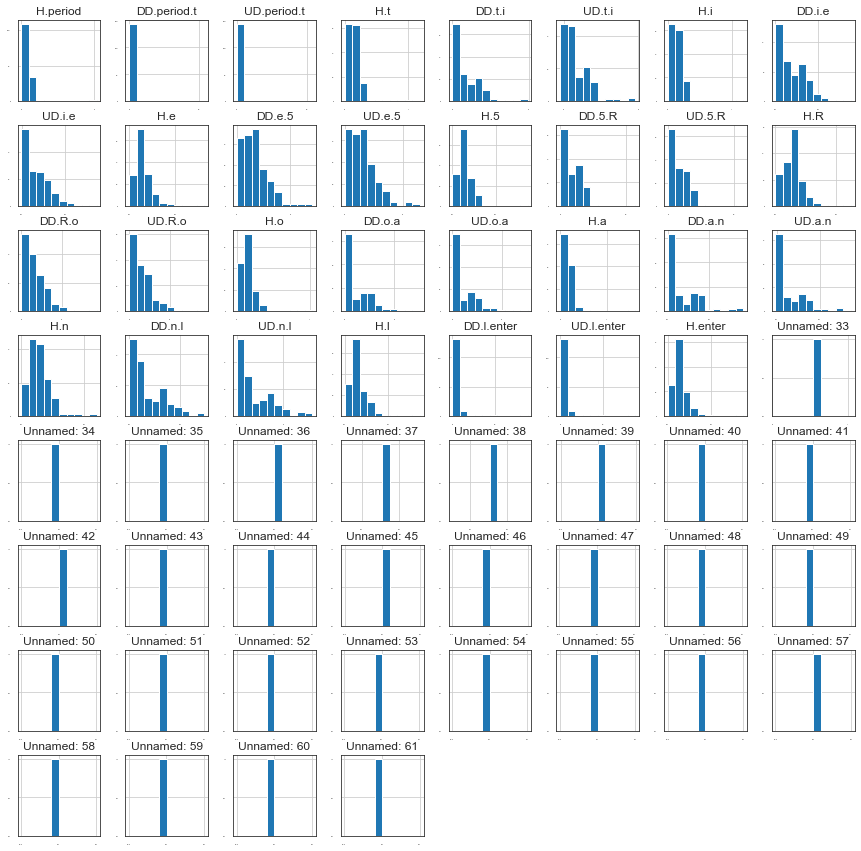

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
data.hist(sharex=False, figsize=(15,15),sharey=False, xlabelsize=2,ylabelsize=2)
plt.show()

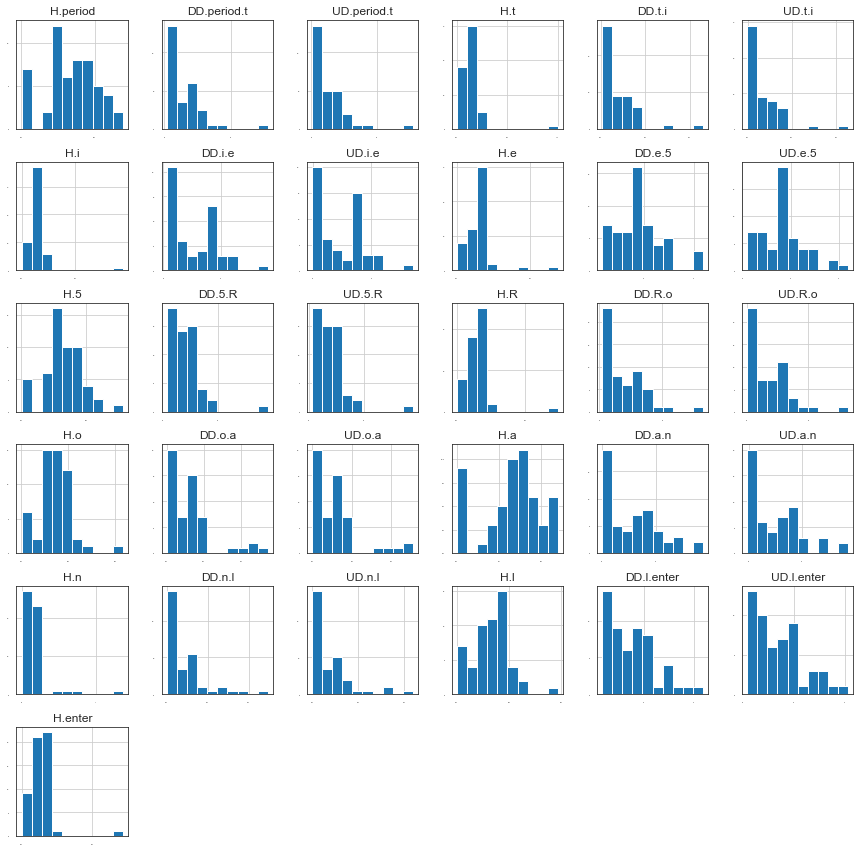

In [89]:
y.hist(sharex=False, figsize=(15,15),sharey=False, xlabelsize=2,ylabelsize=2)
plt.show()

ValueError: `dataset` input should have multiple elements.

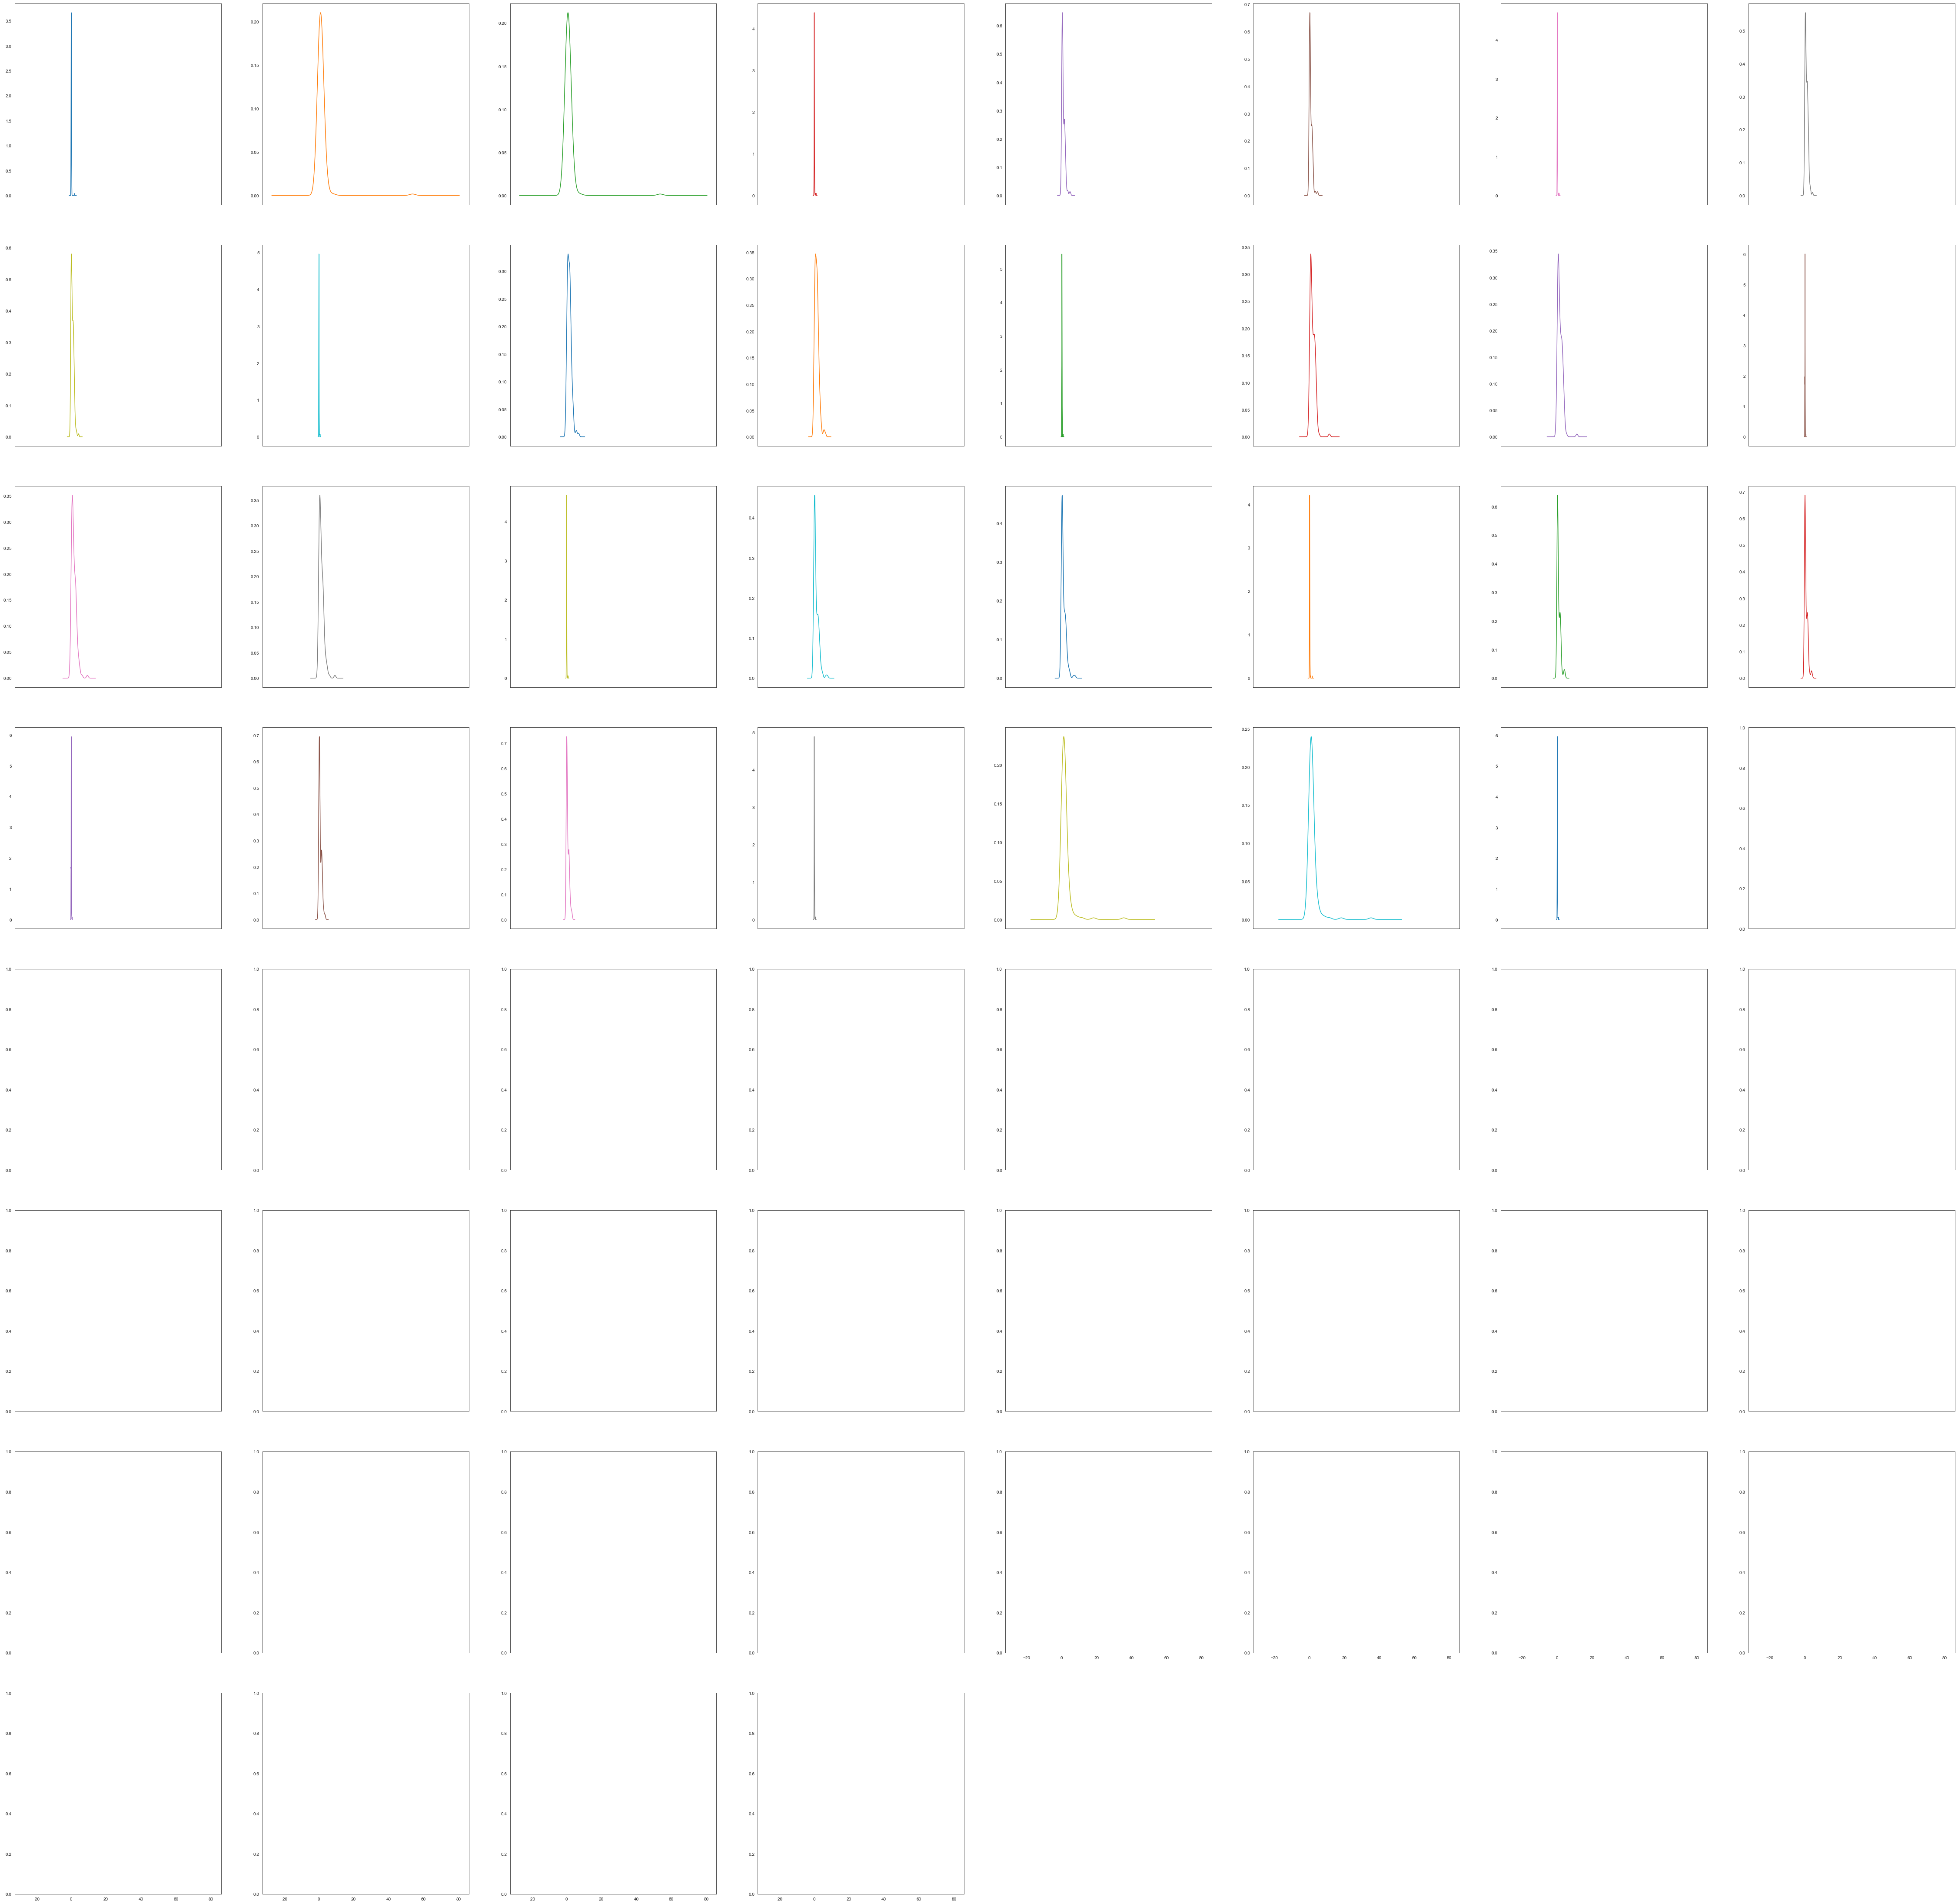

In [91]:
data.plot(kind='density', subplots=True, figsize=(80,80),layout=(8,8), sharex=2, legend=False,fontsize=9)
plt.show()

In [ ]:
y.plot(kind='density', subplots=True, figsize=(80,80),layout=(8,8), sharex=2, legend=False,fontsize=9)
plt.show()

In [ ]:
data.plot(kind='box', subplots=True,figsize=(30,30), layout=(9,9), sharex=False, sharey=False,
fontsize=8)
plt.show()

In [ ]:
y.plot(kind='box', subplots=True,figsize=(30,30), layout=(9,9), sharex=False, sharey=False,
fontsize=8)
plt.show()

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# knn = KNeighborsClassifier(n_neighbors=1)
# knn.fit(X_train,y_train)

In [ ]:
# pred = knn.predict(X_test)
# cm = confusion_matrix(y_test,pred)
# print(cm)
# sns.set_style('white')
# plt.clf()

In [ ]:
# print(classification_report(y_test,pred))


In [ ]:
# model_accuracy = metrics.accuracy_score(y_test, pred)
# print('Accuracy of Model is : ',model_accuracy)

In [ ]:
# #KNN for different k values
# kVals = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
# f1_scores = []

# for k in kVals:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train,y_train)
#     pred = knn.predict(X_test)
#     f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
# plt.plot(kVals,f1_scores)    
# print(f1_scores)

In [ ]:
# from sklearn.svm import SVC
# svm=SVC(C=100)
# svm.fit(X_train,y_train)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# #Logistic Regression
# logmodel = LogisticRegression()
# logmodel.fit(X_train,y_train)
# pred = logmodel.predict(X_test)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# #DT
# d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
# d_classifier.fit(X_train,y_train)
# pred = d_classifier.predict(X_test)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# #Ensemble Random Forest Classifier
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state = 42)
# rf_classifier.fit(X_train,y_train)
# pred = rf_classifier.predict(X_test)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# #Ensemble Random Forest Classifier Fine Tunning
# estimators = [5,10,15,20,30,35,40,48]
# f1_scores = []
# for e in estimators:
#     rf_classifier = RandomForestClassifier(n_estimators=e, random_state = 42)
#     rf_classifier.fit(X_train,y_train)
#     pred = rf_classifier.predict(X_test)
#     f1_scores.append(f1_score(y_test,pred,average='weighted'))
    
# plt.plot(estimators,f1_scores) 
# print(f1_scores)

In [ ]:
# #Bagging Classifier with Decision tree as base learner
# cart = DecisionTreeClassifier()
# model = BaggingClassifier(base_estimator=cart, n_estimators=150, random_state=7)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# #ExtraTreeClassifier
# num_trees = 80
# max_features = 29
# model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# # AdaBoostClassifier
# seed = 7
# num_trees = 100
# model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# seed = 7
# num_trees = 100
# model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
# model.fit(X_train, y_train)
# pred = model.predict(X_test)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# # Try with Different Models
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.svm import SVC
# from sklearn.ensemble import VotingClassifier
# # create the sub models
# estimators = []
# model1 = KNeighborsClassifier(n_neighbors=5)
# estimators.append(('Knn', model1))
# model2 = RandomForestClassifier(n_estimators=100, max_features=29)
# estimators.append(('RandomForest', model2))
# model3 = ExtraTreesClassifier(n_estimators=100, max_features=29)
# estimators.append(('ExtraTree', model3))
# # create the ensemble model
# ensemble = VotingClassifier(estimators)
# ensemble.fit(X_train, y_train)
# pred = ensemble.predict(X_test)
# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))
# cm = confusion_matrix(y_test,pred)
# print(cm)

In [ ]:
# #MLPClassifier
# net = net = MLPClassifier(random_state=2,hidden_layer_sizes=(100,200,330,10),max_iter=500,activation= 'relu', learning_rate= 'invscaling', solver='adam')
# net.fit(X_train,y_train)
# pred= net.predict(X_test)

# print("F1 Score: ", metrics.f1_score(y_test,pred, average='weighted'))
# print("Accuracy Score: ", accuracy_score(y_test,pred))

In [ ]:
# # Test options and evaluation metric
# num_folds = 10
# seed = 7
# scoring = 'accuracy'

In [ ]:
#demo_df=pd.DataFrame({'Integer Feature':[0,1,2,1],'Categorical Feature':['indraniroy389@yahoo.com','ranjan_dmc@yahoo.com','shaktiroy2021@yahoo.com','aroti21@yahoo.com']})
#display(demo_df)

In [ ]:
# Import label encoder
#from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
#label_encoder = preprocessing.LabelEncoder()
  
#data['user']= label_encoder.fit_transform(data['user'])
  
#data['user'].unique()


In [ ]:
#st="0.155,0.548,0.393,0.128,0.606,0.478,0.117,0.535,0.418,0.102,0.823,0.721,0.12,0.711,0.591,0.138,0.55,0.412,0.121,0.328,0.207,0.12,0.27,0.15,0.158,0.308,0.15,0.113,0.389"
#li = list(st.split(','))
#ar = np.array(li)
#arr = ar.reshape(1,29)
#X_new=arr
#X_new=np.array(data[['user']])
#X_new=np.array([[3,8,2]])

#print("X_new.shape:{}".format(X_new.shape))

In [ ]:
# # Spot-Check Algorithms
# models = []
# models.append(('logmodel', LogisticRegression()))
# models.append(('rf_classifier',RandomForestClassifier()))
# models.append(('knn', KNeighborsClassifier()))
# models.append(('cart', DecisionTreeClassifier()))
# models.append(('model',AdaBoostClassifier()))
# models.append(('model',GradientBoostingClassifier()))
# models.append(('model',ExtraTreesClassifier()))
# models.append(('svm', SVC()))
# models.append(('net', MLPClassifier()))
# # evaluate each model in turn
# results = []
# names = []
# for name, model in models:
#          kfold = KFold(n_splits=10,shuffle=True,random_state=seed)
# cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
# results.append(cv_results)
# names.append(name)
# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(msg)


In [ ]:
# # Compare Algorithms
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()


In [ ]:
#  #correlation matrix
# fig = plt.figure()
# ax = fig.add_subplot(111)
# cax = ax.matshow(data.corr(), vmin=-1, vmax=1, interpolation='none')
# fig.colorbar(cax)
# plt.show()


In [ ]:
# # Tune scaled KNN
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
# neighbors = [1,3,5,7,9,11,13,15,17,19,21]
# param_grid = dict(n_neighbors=neighbors)
# model = KNeighborsClassifier()
# kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
# grid_result = grid.fit(rescaledX, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#                  print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:

# # Tune scaled SVM
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
# c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
# kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
# param_grid = dict(C=c_values, kernel=kernel_values)
# model = SVC()
# kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
# grid_result = grid.fit(rescaledX, y_train)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#                print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# # ensembles
# ensembles = []
# ensembles.append(('AB', AdaBoostClassifier()))
# ensembles.append(('GBM', GradientBoostingClassifier()))
# ensembles.append(('RF', RandomForestClassifier()))
# ensembles.append(('ET', ExtraTreesClassifier()))
# results = []
# names = []
# for name, model in ensembles:
#           kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)
# cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
# results.append(cv_results)
# names.append(name)
# msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
# print(msg)


In [ ]:
# # Compare Algorithms
# fig = plt.figure()
# fig.suptitle('Ensemble Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(results)
# ax.set_xticklabels(names)
# plt.show()


In [ ]:
# # prepare the model
# scaler = StandardScaler().fit(X_train)
# rescaledX = scaler.transform(X_train)
# model = SVC(C=1.5)
# model.fit(rescaledX, y_train)
# # estimate accuracy on validation dataset
# rescaledValidationX = scaler.transform(X_test)
# predictions = model.predict(rescaledValidationX)
# print(accuracy_score(y_test, predictions))
# print(confusion_matrix(y_test, predictions))
# print(classification_report(y_test, predictions))


In [ ]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# scaler.fit(X_train)

In [ ]:
# X_train_scaled=scaler.transform(X_train)
# print("transformed shape:{}".format(X_train_scaled.shape))

In [ ]:
# X_test_scaled=scaler.transform(X_test)

In [ ]:
# rf_classifier.fit(X_train_scaled,y_train)


In [ ]:
# print("Scaled test set  accuracy:{:.2f}".format(rf_classifier.score(X_test_scaled,y_test)))

In [164]:
# model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
# model.fit(X_train_scaled, y_train)


In [165]:
# print("Scaled test set  accuracy:{:.2f}".format(model.score(X_test_scaled,y_test)))

In [166]:
# model = BaggingClassifier(base_estimator=cart, n_estimators=150, random_state=7)
# model.fit(X_train_scaled, y_train)
# print("Scaled test set  accuracy:{:.2f}".format(model.score(X_test_scaled,y_test)))

In [167]:
# from sklearn.svm import SVC
# svm=SVC(C=100)
# svm.fit(X_train_scaled,y_train)
# print("Scaled test set  accuracy:{:.2f}".format(svm.score(X_test_scaled,y_test)))

In [168]:
# #st="0.192,2.312,2.12,0.156,1.871,1.715,0.175,1.875,1.7,0.179,1.638,1.459,0.159,3.026,2.867,0.181,2.776,2.595,0.168,1.998,1.83,0.151,1.804,1.653,0.217,1.656,1.439,0.209,1.842"
# #st="0.199,1.884,1.685,0.187,1.514,1.327,0.195,1.778,1.583,0.199,2.664,2.465,0.164,2.955,2.791,0.206,5.259,5.053,0.232,1.118,0.886,0.205,1.662,1.457,0.193,1.207,1.014,0.201,2.049"
# #st="0.241,2.072,1.831,0.238,1.538,1.3,0.233,1.639,1.406,0.217,1.899,1.682,0.205,3.353,3.148,0.197,4.519,4.322,0.205,1.914,1.709,0.235,2.004,1.769,0.211,1.819,1.608,0.182,0.798"
# st="0.219,2.259,2.04,0.194,1.166,0.972,0.178,1.568,1.39,0.173,1.873,1.7,0.168,2.606,2.438,0.151,3.703,3.552,0.197,1.773,1.576,0.22,1.773,1.553,0.178,1.673,1.495,0.135,1.425"
# li = list(st.split(','))
# ar = np.array(li)
# arr = ar.reshape(1,29)

In [169]:
# model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)
# #knn = KNeighborsClassifier(n_neighbors=3)
# model.fit(X_train_scaled,y_train)
# res = model.predict(arr)

In [170]:
# res[0]